## 練習時間
參考 Day 12 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [1]:
# Import 需要的套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### 之前做過的處理

In [2]:
# 設定 data_path
dir_data = './data/'
f_app_train = os.path.join(dir_data, 'application_train.csv')
f_app_test = os.path.join(dir_data, 'application_test.csv')

app_train = pd.read_csv(f_app_train)
app_test = pd.read_csv(f_app_test)

from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
le = LabelEncoder()
le_count = 0

# Iterate through the columns
for col in app_train:
    if app_train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(app_train[col].unique())) <= 2:
            # Train on the training data
            le.fit(app_train[col])
            # Transform both training and testing data
            app_train[col] = le.transform(app_train[col])
            app_test[col] = le.transform(app_test[col])
            
            # Keep track of how many columns were label encoded
            le_count += 1
            
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

# Create an anomalous flag column
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)
# also apply to testing dataset
app_test['DAYS_EMPLOYED_ANOM'] = app_test["DAYS_EMPLOYED"] == 365243
app_test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

# absolute the value of DAYS_BIRTH
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])
app_test['DAYS_BIRTH'] = abs(app_test['DAYS_BIRTH'])

In [3]:
# print(app_train.dtypes)
# print(app_train['DAYS_REGISTRATION'])

reg_Days = app_train[['DAYS_REGISTRATION', 'TARGET']].copy()
reg_Days['reg_BINNED'] = pd.qcut(reg_Days['DAYS_REGISTRATION'], q=10)
reg_Days['reg_BINNED'].value_counts()

(-2540.0, -1491.0]       30783
(-6776.0, -5459.0]       30761
(-9932.0, -8230.0]       30754
(-3537.0, -2540.0]       30753
(-8230.0, -6776.0]       30753
(-24672.001, -9932.0]    30753
(-5459.0, -4504.0]       30748
(-4504.0, -3537.0]       30743
(-1491.0, -690.0]        30739
(-690.0, 0.0]            30724
Name: reg_BINNED, dtype: int64

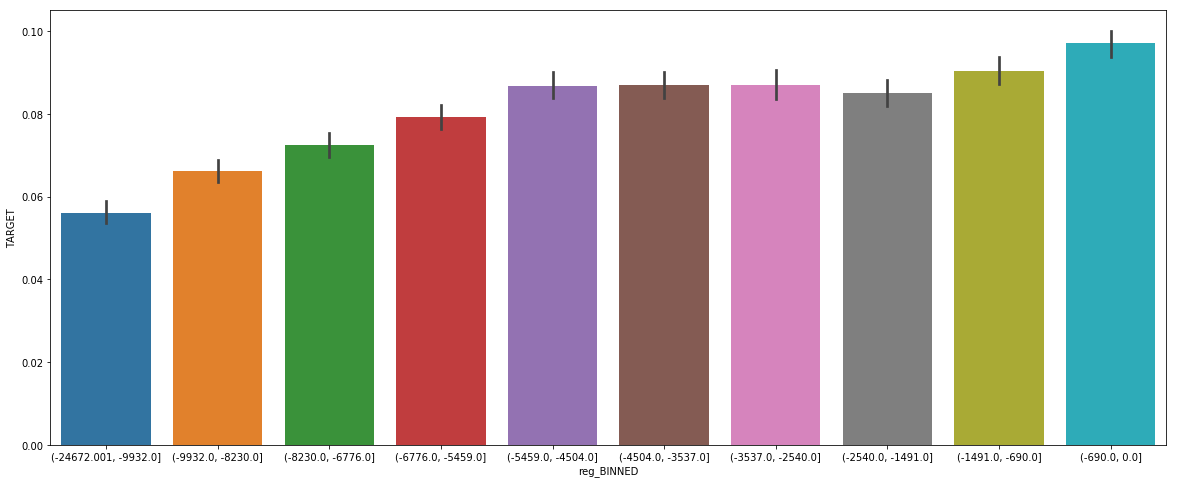

In [4]:
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize = (20, 8))
px = 'reg_BINNED'
py = 'TARGET'
sns.barplot(px, py, data=reg_Days)
plt.show()